## Задание 1
Реализуйте класс LinearRegressionSGD c обучением и и применением линейной регрессии, построенной с помощью стохастического градиентного спуска, с заданным интерфейсом.
Визуализируйте траекторию градиентного спуска (как в лекции)

In [112]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import warnings

np.random.seed(0)

In [113]:
from sklearn.base import BaseEstimator

class LinearRegressionSGD(BaseEstimator):
    def __init__(self, epsilon=1e-6, max_steps=10000, w0=None, alpha=1e-8):
      
        self.epsilon = epsilon
        self.max_steps = max_steps
        self.w0 = w0
        self.alpha = alpha
        self.w = None
        self.w_history = []
    def fit(self, X, y):
        l, d = X.shape
        if self.w0 is None:
            self.w0 = np.zeros(d)

        self.w = self.w0

        for step in range(self.max_steps):
            self.w_history.append(self.w)

            w_new = self.w - self.alpha * self.calc_gradient(X, y)

            if (np.linalg.norm(w_new - self.w) < self.epsilon):
                break
          
            self.w = w_new
        
        return self
    def predict(self, X):
        if self.w is None:
            raise Exception('Not trained yet')
        
        l, d = X.shape

        y_pred = []

        for i in range(l):
            y_pred.append(np.dot(X[i], self.w))

        return np.array(y_pred)
    def calc_gradient(self, X, y):
        l, d = X.shape
        gradient = []
        
        for j in range(d):
            dQ = 0
            for i in range(l):
                dQ += (2/l) * X[i][j] * (np.dot(X[i], self.w) - y[i])
            gradient.append(dQ)

        return np.array(gradient)

In [115]:
def plot_gd(X, y, w_history):
 
    A, B = np.meshgrid(np.linspace(-3, 3, 100), np.linspace(-3, 3, 100))

    levels = np.empty_like(A)
    for i in range(A.shape[0]):
        for j in range(A.shape[1]):
            w_tmp = np.array([A[i, j], B[i, j]])
            levels[i, j] = np.mean(np.power(np.dot(X, w_tmp) - y, 2))

    plt.figure(figsize=(13, 9))
    plt.title('GD trajectory')
    plt.xlabel(r'$w_1$')
    plt.ylabel(r'$w_2$')
    plt.xlim((-2.1, 2.1))
    plt.ylim((-2.1, 2.1))

    # visualize the level set
    CS = plt.contour(A, B, levels, levels=np.logspace(0, 2, num=10), cmap=plt.cm.rainbow_r)
    CB = plt.colorbar(CS, shrink=0.8, extend='both')

    # visualize trajectory
    w_list = np.array(lr.w_history)
    plt.scatter(w_true[0], w_true[1], c='r', marker='*')
    plt.scatter(w_list[:, 0], w_list[:, 1])
    plt.plot(w_list[:, 0], w_list[:, 1])
    plt.show()

In [116]:
n_features = 2
n_objects = 300
num_steps = 100


np.random.seed(1)
w_true = np.random.normal(0, 0.1, size=(n_features, ))
w_0 = np.random.uniform(-2, 2, (n_features))

X = np.random.uniform(-5, 5, (n_objects, n_features))
y = np.dot(X, w_true) + np.random.normal(0, 1, (n_objects))

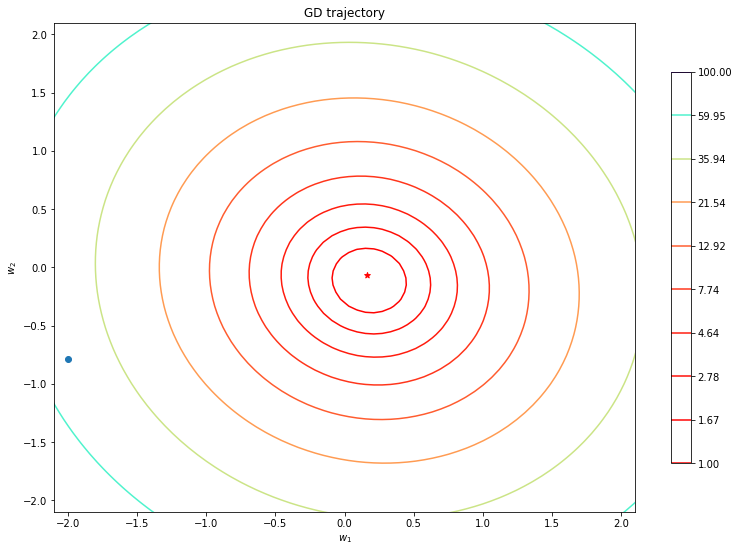

In [118]:
lr = LinearRegressionSGD(w0=w_0)
lr.fit(X, y)

plot_gd(X, y, lr.w_history)

In [119]:
np.random.seed(1)
batch_size = 10
w = w_0.copy()
w_history_list = [w.copy()]
step_size = 1e-2
for i in range(num_steps):
    sample_indices = np.random.randint(0, n_objects,size = batch_size)
    w -= (step_size * 2 * X[sample_indices,:].T @ (X[sample_indices,:] @ w - y[sample_indices]))/y[sample_indices].size 
    w_history_list.append(w.copy())
w_list = np.array(w_history_list)

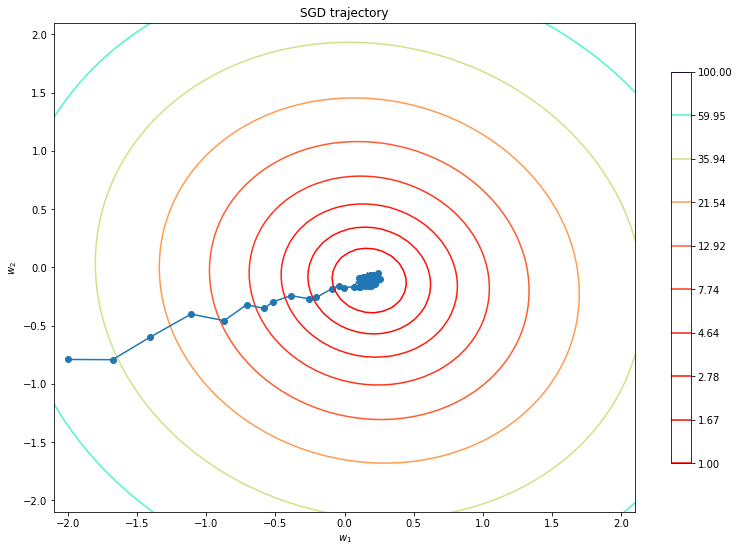

In [120]:
A, B = np.meshgrid(np.linspace(-3, 3, 100), np.linspace(-3, 3, 100))

levels = np.empty_like(A)
for i in range(A.shape[0]):
    for j in range(A.shape[1]):
        w_tmp = np.array([A[i, j], B[i, j]])
        levels[i, j] = np.mean(np.power(np.dot(X, w_tmp) - y, 2))
 
plt.figure(figsize=(13, 9))
plt.title('SGD trajectory')
plt.xlabel(r'$w_1$')
plt.ylabel(r'$w_2$')
plt.xlim((-2.1, 2.1))
plt.ylim((-2.1, 2.1))
CS = plt.contour(A, B, levels, levels=np.logspace(0, 2, num=10), cmap=plt.cm.rainbow_r)
CB = plt.colorbar(CS, shrink=0.8, extend='both')
plt.scatter(w_true[0], w_true[1], c='r', marker='*')
plt.scatter(w_list[:, 0], w_list[:, 1])
plt.plot(w_list[:, 0], w_list[:, 1])
plt.show()

## Задание 2
Предсказать стоимость домов

Сравнить алгоритмы линейной регресии с полным градиентным спуском и стохастическим градиентным спуском по MSE на тестовой выборке и времени работы алгоритма

In [123]:
import warnings
warnings.filterwarnings("ignore")
from sklearn.datasets import load_boston
from sklearn import preprocessing
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from prettytable import PrettyTable
from sklearn.linear_model import SGDRegressor
from sklearn import preprocessing
from sklearn.metrics import mean_squared_error
from numpy import random
from sklearn.model_selection import train_test_split

data = load_boston()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = data.target

X_train, X_test, y_train, y_test = train_test_split(np.array(X), y, test_size=0.3, random_state=10)

In [124]:
print(data.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [132]:
linregr = linear_model.LinearRegression()
linregr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [133]:
linregr.coef_

array([-1.252809  ,  1.56150248, -0.16861008,  0.37449384, -1.7776332 ,
        2.23783886,  0.3168073 , -3.27712377,  2.69471035, -2.10285702,
       -1.74689193,  1.22356691, -3.83454078])

In [148]:
pred_y = linregr.predict(X_test)
mse = mean_squared_error(y_test,pred_y)
print("Прогнозируемая цена дома:",pred_y)
print("Реальная цена дома:",y_test)
print("MSE:",mse)

Прогнозируемая цена дома: [31.4243217  31.96785487 30.93785448 22.34313349 18.83846235 16.20617519
 35.92908162 14.74157477 25.07700756 37.13230282 21.47652971 30.92661826
 28.07823424 34.02599249 33.7778476  40.63701192 24.25899783 23.43019291
 25.547906   21.34469147 32.65467539 17.80506124 25.46149722 25.0207691
 32.51742137 20.51357936 19.47165255 16.87107974 38.44316206  0.3888111
 32.39559257 32.15518102 26.05305015 23.82049084 20.56494632 19.66990981
  3.53212643 35.21058387 27.03280773 27.67994129 34.36642896 29.82003002
 18.31717228 31.55109654 17.93465111 28.4618882  19.39950216 21.60782793
 38.10391926 16.45101411 24.51003632 19.57072199 24.53359986 34.34589029
 26.74381857 34.86340026 21.02859444 19.77400901 18.68461884 24.64911818
 19.89923131 23.52871967 39.56690084 42.81848202 30.38116596 16.96889789
 23.83550068  3.18952008 31.52469303 28.66536677 18.40003941 27.1252398
 19.56625808 25.28579071 25.04642543 10.30562974 38.97693514  8.17901104
 18.51160158 30.32060192 22.

In [145]:
sgd = SGDRegressor()
sgd.fit(X_train,y_train)

SGDRegressor(alpha=0.0001, average=False, early_stopping=False, epsilon=0.1,
             eta0=0.01, fit_intercept=True, l1_ratio=0.15,
             learning_rate='invscaling', loss='squared_loss', max_iter=1000,
             n_iter_no_change=5, penalty='l2', power_t=0.25, random_state=None,
             shuffle=True, tol=0.001, validation_fraction=0.1, verbose=0,
             warm_start=False)

In [146]:
sgd.coef_

array([-1.16166854,  1.37022538, -0.41705992,  0.42216234, -1.55363727,
        2.39503423,  0.24692638, -3.03992652,  1.71939659, -1.15098729,
       -1.71699734,  1.24717361, -3.81591053])

In [147]:
pred_y = sgd.predict(X_test)
mse = mean_squared_error(y_test,pred_y)
print("Прогнозируемая цена дома:",pred_y)
print("Реальная цена дома:",y_test)
print("MSE:",mse)

Прогнозируемая цена дома: [30.68206165 32.17564119 30.9460043  23.52975458 19.10148704 16.01637295
 36.21295212 14.96583077 24.80628268 37.15191382 21.70277123 30.93487158
 27.68340355 33.70365392 33.76195453 40.85885186 24.51531955 22.89364018
 25.5895552  22.0113682  32.78515022 17.66288025 25.83931292 25.13724099
 33.26000445 20.32967498 19.57552925 16.77964127 38.50092477 -0.38772452
 32.83108066 31.98985131 26.40298511 23.9122768  20.25270209 19.93492611
  3.35082308 34.72832246 27.01529923 27.87207068 34.49286542 29.54797894
 18.09989147 31.68452925 17.81335113 28.82144624 19.30345521 21.29774441
 37.90575286 16.61113341 24.49709951 19.32895469 24.18747793 34.96676757
 26.93444808 34.81978641 21.39614421 19.7043925  18.44716341 24.67156879
 20.29823197 23.97569562 40.287854   43.06887929 30.5212769  17.26786423
 23.9346232   2.62808096 31.16335734 29.52935719 18.30501473 27.19187975
 19.27911752 25.01895068 25.49021994 10.10189861 39.13482197  7.80447423
 18.16117691 31.02447592 